In [5]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np

In [6]:
df = pd.read_hdf('data-p1/agg_polls_by_day.h5')
df

,state,pollster,grade,samplesize,population,rawpoll_clinton,rawpoll_trump,adjpoll_clinton,adjpoll_trump,samplesizeadj,day,c_minus_t_raw,c_minus_t_adj
0,Maryland,ABC News/Washington Post,A+,706.0,lv,63.0,27.0,62.70862,28.73903,706.0,2016-09-27,36.0,33.96959
0,Maryland,ABC News/Washington Post,A+,706.0,lv,63.0,27.0,62.70862,28.73903,706.0,2016-09-28,36.0,33.96959
0,Maryland,ABC News/Washington Post,A+,706.0,lv,63.0,27.0,62.70862,28.73903,706.0,2016-09-29,36.0,33.96959
0,Maryland,ABC News/Washington Post,A+,706.0,lv,63.0,27.0,62.70862,28.73903,706.0,2016-09-30,36.0,33.96959
0,Maryland,ABC News/Washington Post,A+,752.0,rv,63.0,28.0,60.84333,30.40937,752.0,2016-03-30,35.0,30.43396
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,U.S.,icitizen,NaN,1000.0,rv,42.0,37.0,45.81087,42.71049,1000.0,2016-09-15,5.0,3.10038
1,U.S.,icitizen,NaN,1000.0,rv,42.0,37.0,45.81087,42.71049,1000.0,2016-09-16,5.0,3.10038
1,U.S.,icitizen,NaN,1000.0,rv,42.0,37.0,45.81087,42.71049,1000.0,2016-09-17,5.0,3.10038
1,U.S.,icitizen,NaN,1000.0,rv,42.0,37.0,45.81087,42.71049,1000.0,2016-09-18,5.0,3.10038


In [7]:
#df = df.query("grade == ['A+','A','A-','B+']")
# df = df[(df["state"] == 'U.S.')& (df["population"] == 'lv')]
df = df[df["population"] == 'lv']


def weighted_average(group, value_column):
    sqrt_sample_sizes = group['samplesizeadj'] ** 0.5
    median_sqrt_sample_size = group['samplesizeadj'].median() ** 0.5
    weights = sqrt_sample_sizes / median_sqrt_sample_size
    return (group[value_column] * weights).sum() / weights.sum()



df_agg = df.groupby(['day','state']).apply(
    lambda group: pd.Series({
        'rawpoll_clinton': weighted_average(group, 'rawpoll_clinton'),
        'rawpoll_trump': weighted_average(group, 'rawpoll_trump'),
        'adjpoll_clinton': weighted_average(group, 'adjpoll_clinton'),
        'adjpoll_trump': weighted_average(group, 'adjpoll_trump'),
        'c_minus_t_raw': weighted_average(group, 'c_minus_t_raw'),
        'c_minus_t_adj': weighted_average(group, 'c_minus_t_adj')
    })
).reset_index()

df_agg = df_agg.reset_index()

print("Aggregated DataFrame (df_agg):")
print(df_agg)

Aggregated DataFrame (df_agg):
      index        day          state  rawpoll_clinton  rawpoll_trump  \
0         0 2015-11-29        Florida        49.000000      41.000000   
1         1 2015-11-29           U.S.        51.000000      37.000000   
2         2 2015-11-30        Florida        49.000000      41.000000   
3         3 2015-11-30           U.S.        51.000000      37.000000   
4         4 2015-12-01        Florida        49.000000      41.000000   
...     ...        ...            ...              ...            ...   
6080   6080 2016-11-07       Virginia        45.400495      37.545516   
6081   6081 2016-11-07     Washington        47.611918      31.954697   
6082   6082 2016-11-07  West Virginia        27.701044      54.441953   
6083   6083 2016-11-07      Wisconsin        43.676739      37.735296   
6084   6084 2016-11-07        Wyoming        22.702532      54.559485   

      adjpoll_clinton  adjpoll_trump  c_minus_t_raw  c_minus_t_adj  
0           46.786020  

C:\Users\mairi\AppData\Local\Temp\ipykernel_29844\879475652.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_agg = df.groupby(['day','state']).apply(


In [8]:
df_agg.to_csv('data-p1/all_states_agg_by_day_all_grades.csv',index=False)
df_agg.to_hdf('data-p1/all_states_agg_by_day_all_grades.h5',key='df', mode='w', format='t')

In [37]:
target = df_agg[df_agg['day']>=pd.to_datetime('2016-08-01')]
#target = target[target['population'] == 'lv']
# target['delta'] = target['c_minus_t_raw'] - target.shift(1)['c-minus-t']

target


,index,day,c_minus_t_raw,c_minus_t_adj
193,193,2016-08-01,0.715470,-1.975031
194,194,2016-08-02,-0.010508,-2.543678
195,195,2016-08-03,-0.062444,-2.610978
196,196,2016-08-04,0.267065,-2.227139
197,197,2016-08-05,1.411254,-0.994568
...,...,...,...,...
287,287,2016-11-03,0.771920,0.302609
288,288,2016-11-04,0.966597,0.513431
289,289,2016-11-05,0.892705,0.392473
290,290,2016-11-06,1.102391,0.567667


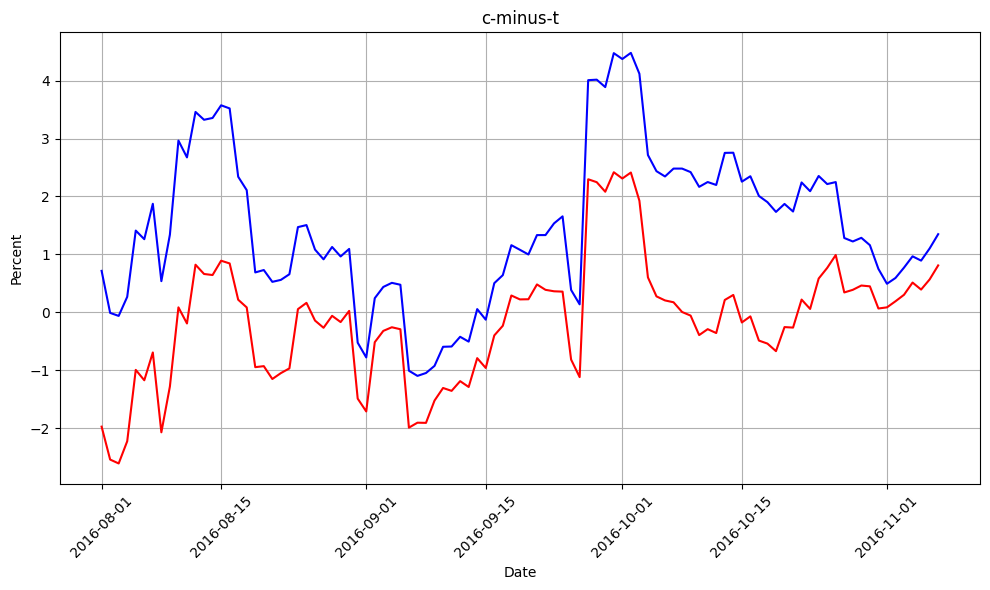

In [45]:
# Plot 'c-minus-t' by day
plt.figure(figsize=(10, 6))
# plt.plot(target['day'], target['c-minus-t'], marker=None, linestyle='-', color='b')
plt.plot(target['day'], target['c_minus_t_raw'], marker=None, linestyle='-', color='b')
plt.plot(target['day'], target['c_minus_t_adj'], marker=None, linestyle='-', color='r')
#plt.plot(target['day'], target['delta'], marker=None, linestyle='-', color='r')



# Add labels and title
plt.xlabel('Date')
plt.ylabel('Percent')
plt.title('c-minus-t')
plt.grid(True)

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
percentile = target['c-minus-t'].quantile([0.1,0.9]) # to show more entries

# Get rows where 'column_name' exceeds the 95th percentile
worst_clinton = target[target['c-minus-t'] <= percentile[0.1]]

worst_clinton

KeyError: 'c-minus-t'

In [45]:
best_clinton = target[target['c-minus-t'] >= percentile[0.9]]
best_clinton

,day,population,c-minus-t,delta
802,2016-09-28,lv,2.935580,0.068880
806,2016-09-30,lv,3.278033,0.416356
808,2016-10-01,lv,3.207561,-0.070472
810,2016-10-02,lv,3.322758,0.115197
813,2016-10-03,lv,2.919941,-0.402817
842,2016-10-13,lv,2.951806,0.405197
845,2016-10-14,lv,2.974145,0.022339


In [46]:
percentile_delta = target['delta'].quantile([0.1,0.9])

# Get rows where 'column_name' exceeds the 95th percentile
worst_clinton_delta = target[target['delta'] <= percentile_delta[0.1]]

worst_clinton_delta

,day,population,c-minus-t,delta
755,2016-09-06,lv,-0.813047,-1.039837
796,2016-09-25,lv,0.186380,-0.793975
813,2016-10-03,lv,2.919941,-0.402817
816,2016-10-04,lv,2.395921,-0.524020
847,2016-10-15,lv,2.630972,-0.343173
852,2016-10-17,lv,2.296332,-0.395724
880,2016-10-27,lv,1.663507,-0.464145


In [47]:
best_clinton_delta = target[target['delta'] >= percentile_delta[0.9]]
best_clinton_delta

,day,population,c-minus-t,delta
747,2016-09-02,lv,-0.050294,0.437741
772,2016-09-14,lv,-0.162278,0.379547
778,2016-09-16,lv,0.292973,0.498831
782,2016-09-18,lv,0.736053,0.401280
800,2016-09-27,lv,2.866699,2.910209
806,2016-09-30,lv,3.278033,0.416356
842,2016-10-13,lv,2.951806,0.405197
